In [23]:
import pandas as pd

In [24]:
df_colaboradores_dezembro = pd.read_excel('base_colaboradores_dez24_ficticia.xlsx')
df_pontuacao = pd.read_excel('pontuacao_ead_ficticia.xlsx')
df_lean = pd.read_excel('treinamento_lean_ficticia.xlsx')
df_financeiro = pd.read_excel('educacao_financeira_ficticia.xlsx')
df_trilha = pd.read_excel('trilha_essencial_ficticia.xlsx')
df_bdf_bsf = pd.read_excel('base_colaboradores_bdf_bsf_ficticia.xlsx')


# 2. Limpar os dados

In [25]:
df_colaboradores_dezembro['Número do CPF'] = df_colaboradores_dezembro['Número do CPF'].astype(str).str.replace(r'[\.\-\s]', '', regex=True)
df_pontuacao['Número do CPF'] = df_pontuacao['Número do CPF'].astype(str).str.replace(r'[\.\-\s]', '', regex=True)
df_financeiro['Número do CPF'] = df_financeiro['Número do CPF'].astype(str).str.replace(r'[\.\-\s]', '', regex=True)
df_trilha['Número do CPF'] = df_trilha['Número do CPF'].astype(str).str.replace(r'[\.\-\s]', '', regex=True)
df_bdf_bsf['Número do CPF'] = df_bdf_bsf['Número do CPF'].astype(str).str.replace(r'[\.\-\s]', '', regex=True)


### a) Remover linhas sem e-mail, sem CPF, ou função "Conselheiro"

In [26]:
df_colaboradores_dezembro = df_colaboradores_dezembro[
    (df_colaboradores_dezembro['e-mail'].notna()) &
    (df_colaboradores_dezembro['e-mail'].str.strip() != "") &
    (df_colaboradores_dezembro['Número do CPF'].notna()) &
    (df_colaboradores_dezembro['Denominação de cargo'].str.lower() != "conselheiro")
]

In [27]:
df_colaboradores_dezembro

,Nº pes.,Nome,Denominação de cargo,Txt.subárea rec.hum.,Data de Admissão,Ausência/Afastamento,Número do CPF,e-mail
0,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com
1,101,Bruno Silva,Analista,BD,2021-01-01,NaN,792858658189,bruno1@empresa.com
4,104,Elisa Silva,Estagiário,Diretoria,2018-02-13,NaN,448384259320,elisa4@empresa.com
5,105,Flávio Mendes,Analista,Financeiro,2018-12-15,NaN,467967452718,flávio5@empresa.com
6,106,Gabriela Lima,Gerente de Loja SR,Loja,2023-10-28,NaN,227487180665,gabriela6@empresa.com
8,108,Igor Lima,Estagiário,BD,2021-05-15,NaN,181975338987,igor8@empresa.com
9,109,Juliana Silva,Analista,Operações,2023-11-21,NaN,266479463314,juliana9@empresa.com
10,110,Karla Lima,Gerente de Loja SR,Tecnologia,2019-08-13,NaN,723750275646,karla10@empresa.com
12,112,Mariana Lima,Estagiário,Financeiro,2019-10-23,NaN,924423510374,mariana12@empresa.com
13,113,Natália Souza,Analista,Loja,2019-05-05,NaN,317771611505,natália13@empresa.com


In [28]:
#  b) Tratar duplicidade de cadastro (CPFs repetidos)

df_colaboradores_dezembro = df_colaboradores_dezembro.drop_duplicates(subset=['Número do CPF'], keep='first')



In [29]:
#c) Filtrar só os colaboradores admitidos até 31/12/2023

df_colaboradores_dezembro['Data de Admissão'] = pd.to_datetime(df_colaboradores_dezembro['Data de Admissão'])
df_colaboradores_dezembro = df_colaboradores_dezembro[df_colaboradores_dezembro['Data de Admissão'] <= pd.to_datetime('2023-12-31')]



C:\Users\ADOLFO LUIZ FARIAS\AppData\Local\Temp\ipykernel_1060\2812374933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colaboradores_dezembro['Data de Admissão'] = pd.to_datetime(df_colaboradores_dezembro['Data de Admissão'])


In [30]:
df_merge = pd.merge(
    df_colaboradores_dezembro, 
    df_pontuacao[['Número do CPF', 'CONQUISTADO']], 
    on='Número do CPF', how='left'
)


In [31]:
colunas_cursos = [
    'Curso 2', 'Curso 3', 'Curso 4', 'Curso 5',
    'Curso 6', 'Curso 7', 'Curso 8', 'Curso 9'
]

def verificar_trilha(linha):
    for coluna in colunas_cursos:
        valor = str(linha[coluna]).strip().lower()
        if valor != "sim":
            return "Inapto"
    return "Apto"

df_trilha['Trilha_Apta'] = df_trilha.apply(verificar_trilha, axis=1)

In [32]:
# Merge com trilha

df_merge = pd.merge(
    df_merge, 
    df_trilha[['Número do CPF', 'Trilha_Apta']], 
    on='Número do CPF', how='left'
)


In [33]:
# Merge com treinamento Lean (usando Nº pes.)
df_merge = pd.merge(
    df_merge, 
    df_lean[['Nº pes.', 'ELEGÍVEL PR']], 
    on='Nº pes.', how='left'
)
df_merge = df_merge.rename(columns={'ELEGÍVEL PR': 'Lean Elegível'})


In [34]:
df_merge = pd.merge(
    df_merge, 
    df_financeiro[['Número do CPF', 'ELEGÍVEL PR']], 
    on='Número do CPF', how='left'
)
df_merge = df_merge.rename(columns={'ELEGÍVEL PR': 'Financeira Elegível'})


In [35]:
# Marca se é BD/BSF
df_merge['IS_BSF_BD'] = df_merge['Txt.subárea rec.hum.'].isin(['BSF', 'BD'])

# Status Pontuação
df_merge['Status_Pontuacao'] = df_merge.apply(
    lambda row: "Apto" if (row['IS_BSF_BD'] or (pd.notnull(row['CONQUISTADO']) and row['CONQUISTADO'] >= 2000)) else "Inapto", axis=1
)

In [36]:
# Status Treinamento Lean
df_merge['Status_Lean'] = df_merge['Lean Elegível'].apply(lambda x: "Apto" if str(x).strip().lower() == "sim" else "Inapto")

# Status Educação Financeira
df_merge['Status_Financeira'] = df_merge['Financeira Elegível'].apply(lambda x: "Apto" if str(x).strip().lower() == "sim" else "Inapto")

In [37]:
df_merge

,Nº pes.,Nome,Denominação de cargo,Txt.subárea rec.hum.,Data de Admissão,Ausência/Afastamento,Número do CPF,e-mail,CONQUISTADO,Trilha_Apta,Lean Elegível,Financeira Elegível,IS_BSF_BD,Status_Pontuacao,Status_Lean,Status_Financeira
0,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto
1,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto
2,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto
3,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto
4,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto
5,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto
6,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto
7,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto
8,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,2064,Apto,Não,Sim,True,Apto,Inapto,Apto
9,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,2064,Apto,Não,Não,True,Apto,Inapto,Inapto


In [38]:
# 5. Criar colunas de status e inelegibilidade

def motivo_inelegibilidade(row):
    motivos = []
    if row['Status_Pontuacao'] == "Inapto":
        motivos.append("Pontuação EAD insuficiente")
    if row['Status_Lean'] == "Inapto":
        motivos.append("Treinamento Lean não realizado")
    if row['Status_Financeira'] == "Inapto":
        motivos.append("Educação Financeira não realizada")
    if row['Trilha_Apta'] == "Inapto":
        motivos.append("Trilha Essencial incompleta")
    if len(motivos) == 0:
        return "Apto"
    else:
        return "; ".join(motivos)

df_merge['Motivo'] = df_merge.apply(motivo_inelegibilidade, axis=1)
df_merge['Elegível PL'] = df_merge['Motivo'].apply(lambda x: "Apto" if x == "Apto" else "Inapto")


In [39]:
df_merge

,Nº pes.,Nome,Denominação de cargo,Txt.subárea rec.hum.,Data de Admissão,Ausência/Afastamento,Número do CPF,e-mail,CONQUISTADO,Trilha_Apta,Lean Elegível,Financeira Elegível,IS_BSF_BD,Status_Pontuacao,Status_Lean,Status_Financeira,Motivo,Elegível PL
0,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
1,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
2,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
3,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
4,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado; Trilha Essenci...,Inapto
5,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
6,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado; Trilha Essenci...,Inapto
7,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
8,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,2064,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
9,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,alice0@empresa.com,2064,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto


In [40]:
df_merge[df_merge['Elegível PL'] == "Apto"].to_excel("colaboradores_aptos.xlsx", index=False)
df_merge[df_merge['Elegível PL'] == "Inapto"].to_excel("colaboradores_inelegiveis.xlsx", index=False)


In [41]:
df_merge['e-mail'] = 'laiznovaisf1@gmail.com'

In [42]:
df_merge

,Nº pes.,Nome,Denominação de cargo,Txt.subárea rec.hum.,Data de Admissão,Ausência/Afastamento,Número do CPF,e-mail,CONQUISTADO,Trilha_Apta,Lean Elegível,Financeira Elegível,IS_BSF_BD,Status_Pontuacao,Status_Lean,Status_Financeira,Motivo,Elegível PL
0,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
1,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
2,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
3,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
4,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado; Trilha Essenci...,Inapto
5,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
6,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Inapto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado; Trilha Essenci...,Inapto
7,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,1138,Inapto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto
8,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,2064,Apto,Não,Sim,True,Apto,Inapto,Apto,Treinamento Lean não realizado,Inapto
9,100,Alice Silva,Estagiário,BSF,2019-04-05,NaN,754214125859,laiznovaisf1@gmail.com,2064,Apto,Não,Não,True,Apto,Inapto,Inapto,Treinamento Lean não realizado; Educação Finan...,Inapto


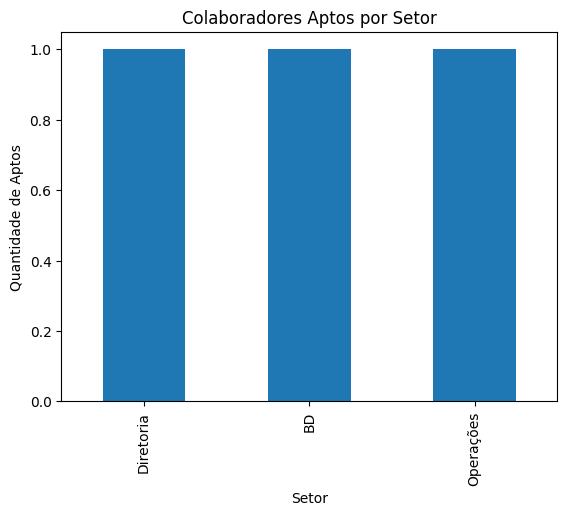

In [43]:
import matplotlib.pyplot as plt

aptos_por_setor = df_merge[df_merge['Elegível PL'] == "Apto"]['Txt.subárea rec.hum.'].value_counts()
aptos_por_setor.plot(kind='bar')
plt.title('Colaboradores Aptos por Setor')
plt.xlabel('Setor')
plt.ylabel('Quantidade de Aptos')
plt.show()


In [44]:
import win32com.client as win32

def envia_emails_inaptos(df_merge):
    """
    Envia por e-mail o motivo da inelegibilidade para cada colaborador Inapto.
    Usa Outlook instalado.
    """
    inaptos = df_merge[df_merge['Elegível PL'] == 'Inapto']

    for i, row in inaptos.iterrows():
        nome = row['Nome']
        email_usuario = row['e-mail']  # ajuste se for 'Email'
        motivo = row.get('Motivo', 'Não especificado')

        # Cria o e-mail personalizado
        outlook = win32.Dispatch('Outlook.Application')
        email = outlook.CreateItem(0)
        email.Subject = "[RH] - Informações sobre sua Elegibilidade para PL"
        email.HTMLBody = f"""
        <p>Olá {nome},</p>
        <p>Após análise dos critérios para Participação nos Lucros (PL), identificamos que você não está apto neste momento pelos seguintes motivos:</p>
        <p><strong>{motivo}</strong></p>
        <p>Qualquer dúvida, entre em contato com o RH.</p>
        <p>Atenciosamente,<br>
        Equipe de RH</p>
        """
        email.To = email_usuario
        email.Send()
        print(f"E-mail enviado para {nome} <{email_usuario}> informando motivo de inelegibilidade.")

    print("Todos os e-mails dos inelegíveis foram processados.")
